# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [77]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv(r'C:\Users\Sarah\Documents\DAFT_NOV_21_01\module_2\Lab_5_ Pivot_Tables_and_Crosstab\Employee.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
employees[['Department','Salary']].groupby(['Department']).agg('mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
employees.pivot_table(index=["Department"], values = ['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
employees.pivot_table(index = ['Department'], values =['Salary','Title'], fill_value=0)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
employees.pivot_table(index = ['Department','Title'], values =['Salary','Years'], fill_value=0)

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
employees.pivot_table(index = ['Department','Title'], values =['Salary'], aggfunc=('mean','count'), fill_value=0)

Salary      
                      count  mean
Department Title                 
HR         VP             1  70.0
           analyst        2  32.5
IT         VP             1  70.0
           analyst        2  32.5
           associate      1  60.0
Sales      associate      2  55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [37]:
# your code here
employees.pivot_table(index = ['Department','Title'], values =['Salary'], aggfunc=('median','min','max','std'),fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

In [9]:
"""
VPs and associates have no std and the same max/min/median since these are jobs with very few (generally 1) people
so no comparison is possible
analyst jobs have the same data, whether they are in HR or IT department
"""

'\nVPs and associates have no std and the same max/min/median since these are jobs with very few (generally 1) people\nso no comparison is possible\nanalyst jobs have the same data, whether they are in HR or IT department\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [38]:
# your code here
employees.pivot_table(index = ['Department','Title'], values =['Salary'], aggfunc=('median','min','max','std'),fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [43]:
# your code here
employees.pivot_table(index = ['Department'], values =['Salary'], aggfunc=('count','sum'),fill_value=0)

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [45]:
# your code here
employees.pivot_table(index = ['Department','Title','Salary'], values =['Years'], aggfunc=('sum'),fill_value=0)

Years
Department Title     Salary       
HR         VP        70          8
           analyst   30          2
                     35          4
IT         VP        70          8
           analyst   30          2
                     35          1
           associate 60          7
Sales      associate 55          5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [47]:
# your code here
fitbit = pd.read_csv(r'C:\Users\Sarah\Documents\DAFT_NOV_21_01\module_2\Lab_5_ Pivot_Tables_and_Crosstab\Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [53]:
# your code here
print(fitbit.dtypes)
print(fitbit.describe())

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object
       Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max   

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [57]:
# your code here
fitbit[['Minutes Very Active','Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [17]:
import matplotlib.pyplot as plt;

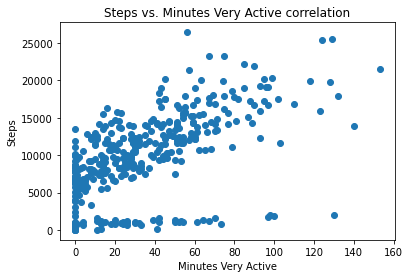

In [59]:

plt.scatter(x='Minutes Very Active', y='Steps', data=fitbit)
plt.title(label = 'Steps vs. Minutes Very Active correlation')
plt.xlabel(xlabel = 'Minutes Very Active')
plt.ylabel(ylabel = 'Steps')
plt.show()



#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [19]:
"""
Very active minutes tend to last under an hour with either 0 steps or in average 10000 steps
The average amount of steps tends to be at 10 000 (good news since it is the daily requirement for good health)
0 Minutes very Active = number of steps from 0 to 14 000 . 
Could be explained if Very Active means high cardiac frequency or the ongoing time moving
"""

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [60]:
# your code here
fitbit[['Minutes Sedentary','Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

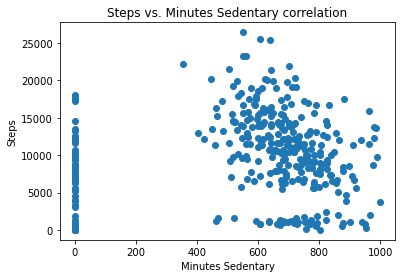

In [62]:
# your code here
plt.scatter(x='Minutes Sedentary', y='Steps', data=fitbit)
plt.title(label = 'Steps vs. Minutes Sedentary correlation')
plt.xlabel(xlabel = 'Minutes Sedentary')
plt.ylabel(ylabel = 'Steps')
plt.show()

In [22]:
"""
Minutes Sedentary are defined by more than 10 successiv minutes without making steps
Here it is either 0 (people who would put their wath on only to do sports?)
or between 400 and 1000 (people who would keep their watch on the whole day including all activities perhaps?)

"""

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [63]:
# your code here
fitbit[['MinutesOfSleep','Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

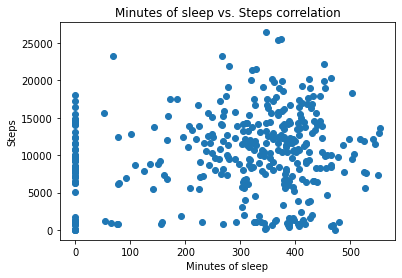

In [65]:
# your code here
plt.scatter(x='MinutesOfSleep',y='Steps', data=fitbit)
plt.title(label='Minutes of sleep vs. Steps correlation')
plt.xlabel(xlabel='Minutes of sleep')
plt.ylabel(ylabel='Steps')
plt.show()

In [25]:
"""
the data is not concentrated, we could say the number of minutes of sleep is a little concentrated 
between 300-500 but it is not blatant
No matter the number of minutes of sleep, the number of steps also varies largely from 0 to 25 000

"""

'\nyour commments here\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [66]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [70]:
# your code here
cor_fit= fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [74]:
# your code here
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [76]:
# your code here
time_grades = pd.read_csv(r'C:\Users\Sarah\Documents\DAFT_NOV_21_01\module_2\Lab_5_ Pivot_Tables_and_Crosstab\time_grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

<AxesSubplot:ylabel='Name'>

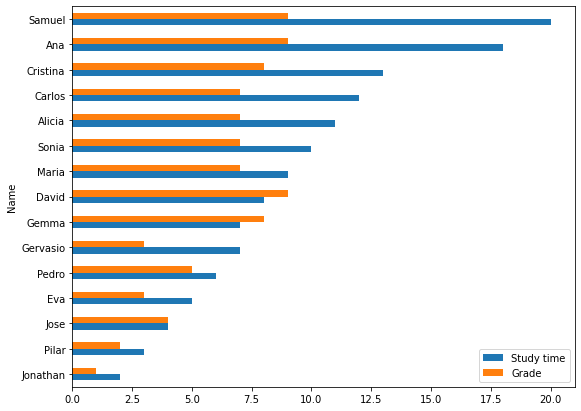

In [113]:
# your code here
time_grades.sort_values(by=['Study time'], inplace=True)
time_grades.plot.barh(x="Name", y=["Study time", "Grade"], figsize=(9,7))


#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [98]:
# your code here
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [100]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [32]:
"""
Pearson assumes that the data is normally computed whereas Spearman does not 
the correlation seems nevertheless quite high since close to 1 in both cases.
"""

'\nyour commments here\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0.5, 1.0, 'Study time vs. Grade')

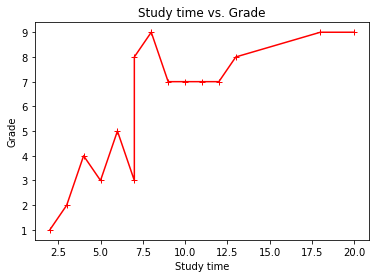

In [128]:
# your code here
plt.plot(time_grades['Study time'],time_grades['Grade'], 'r-+')
plt.xlabel(xlabel = 'Study time')
plt.ylabel(ylabel = 'Grade')
plt.title(label = 'Study time vs. Grade')

In [34]:
"""
Based on this plot working 8 to 13 hours seems to be the best time/grade relationship.
Working more than 13hours does not have a big impact on the grade, 
and working less than 8 passes grades from 7 to 4 or5
"""

'\nyour commments here\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [35]:
"""
Pearson assumes that the data is normally computed whereas Spearman does not 
Pearson is based on a linear relationship : both values change with a regular pace at the same time
Spearman evaluates a monotonic relationship : here the correlation coefficient is based on the ranked values

"""

'\nyour commments here\n'